Figure 1A,B from Mahdavi & Siegel (2021) Indoor Air (IA)

This figure illustrates the size distribution of "RP-1649" and "HUD: TXHHU0023-13".

Plot type: Line plot

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

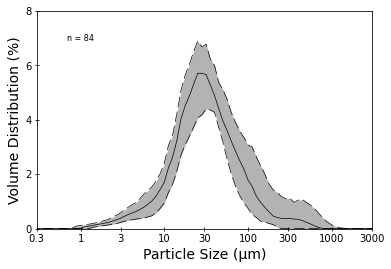

In [2]:
##############################
### Step 1: RP-1649 Figure ###
##############################

df = pd.read_excel(r'natl_psd_master.xlsx')
list_all = list(df.columns)
keep_cols = [col for col in df.columns if ('mean' in col) & ('D' in col)]
size = df['Size']
df = df[keep_cols]
df_sketch = df.quantile(q=[0.05, 0.5, 0.95], axis=1)
df_sketch = df_sketch.T
# df_sketch.rename(columns = P)


plt.figure()
plt.fill_between(size, df_sketch[0.05], df_sketch[0.95],
                 facecolor = 'dimgrey', color = 'dimgrey', alpha = 0.5, linewidth = 0)

plt.plot(size, df_sketch[0.05], ls = (0, (15, 6)), c = 'k', linewidth = 0.7)
plt.plot(size, df_sketch[0.95], ls = (0, (15, 6)), c = 'k', linewidth = 0.7)
plt.plot(size, df_sketch[0.5], c = 'k', linewidth = 0.7)

plt.xscale('log')
   
a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xlim(0.3, 3000)
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 8)
plt.yticks(np.arange(0, 9, step=2))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

plt.text(1,7,'n = 84', ha='center', va='center', fontsize = 8)

plt.savefig(r'Figure1a.jpg', format='jpg', dpi=1600, bbox_inches='tight')


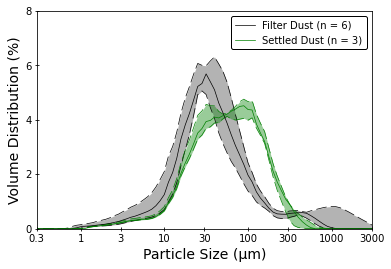

In [3]:
df = pd.read_excel(r'hud_psd_master.xlsx')
list_all = list(df.columns)
size = df['Size']

keep_cols_fd = [col for col in df.columns if ('mean' in col) & ('FD' in col)]
keep_cols_sd = [col for col in df.columns if ('mean' in col) & ('SD' in col)]

df_sketch_fd = df[keep_cols_fd]
df_sketch_sd = df[keep_cols_sd]

df_sketch_fd = df_sketch_fd.apply(pd.DataFrame.describe, axis = 1)
df_sketch_sd = df_sketch_sd.apply(pd.DataFrame.describe, axis = 1)

plt.figure()
plt.fill_between(size, df_sketch_fd['min'], df_sketch_fd['max'],
                 facecolor = 'dimgrey', color = 'dimgrey', alpha = 0.5, linewidth = 0)

plt.fill_between(size, df_sketch_sd['min'], df_sketch_sd['max'],
                 facecolor = 'green', color = 'green', alpha = 0.4, linewidth = 0)

plt.plot(size, df_sketch_fd['min'], c = 'k', ls = (0, (15, 6)), linewidth = 0.7)
plt.plot(size, df_sketch_fd['max'], c = 'k', ls = (0, (15, 6)), linewidth = 0.7)

plt.plot(size, df_sketch_sd['min'], c = 'g', ls = (0, (15, 6)), linewidth = 0.7)
plt.plot(size, df_sketch_sd['max'], c = 'g', ls = (0, (15, 6)), linewidth = 0.7)


plt.plot(size, df_sketch_fd['50%'], c = 'k', linewidth = 0.7, label = 'Filter Dust (n = 6)')
plt.plot(size, df_sketch_sd['50%'], c = 'g', linewidth = 0.7, label = 'Settled Dust (n = 3)')

plt.xscale('log')
    
a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xlim(0.3, 3000)
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 8)
plt.yticks(np.arange(0, 9, step=2))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

plt.legend(loc =1, frameon = True, edgecolor = 'black', framealpha=1)

plt.savefig(r'Figure1b.jpg', format='jpg', dpi=1600, bbox_inches='tight')

End of Code